In [1]:
%matplotlib inline                                                             
import matplotlib as mpl                                                      #packages imported
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [2]:
def spheref(x,y):                                                             #sphere function for distance
    d = float(x**2+y**2)
    return d

In [3]:
def light(d):                                                                 #light intensity function
    if (d==0):
        l=999
    else:    
        l=1/d
    return l

In [4]:
def roulette_wheel(total):                                                    #roulette wheel function
    global c
    leader=-1
    r = random.uniform(0,1)
    for n in range(c):
        if r<total[n]:
            leader=n
            break
    return leader 

In [5]:
def probability_func(values,prob):                                           #probability (max) func
    global c
    for j in range(c):
        prob.append(values[j]/sum(values))
    return prob    

In [6]:
def slope(x1, y1, x2, y2):                                                   #slope function
    if(x1==x2):
        t=math.pi
    else:    
        m = (float)(y2-y1)/(x2-x1)
        t = math.atan(m)
    return(t)

In [7]:
def dot(x1,y1,x2,y2):                                                        #dot product
    return x1*x2+y1*y2

In [8]:
def pointlinedist(x1, y1, a, b, c):                                          #distance from point to a line
    len = abs((a * x1 + b * y1 + c) / math.sqrt(a*a + b*b)) 
    return len


In [9]:
def generate_obs():                                                          #creating obstacles
    global l,b,rectangle
    
    rectangle.append([-l,-b,2*l,b,0])
    rectangle.append([-l,-b,l,2*b,0])
    for i in range(0,10):
        xr=random.uniform(0,l)
        yr=random.uniform(0,b)
        wr=random.uniform(0.5,1)
        hr=random.uniform(0.5,1)
        ag=random.randint(0,45)
        rectangle.append([xr,yr,wr,hr,ag])
        

M  of coordinates (x,y) is inside the rectangle iff

(0<AM⋅AB<AB⋅AB)∧(0<AM⋅AD<AD⋅AD)
(scalar product of vectors)

In [10]:
def checkarea(xc,yc):                                                       #checking position of point wrt obstacle
    global rectangle
    flag=True
    
    for j in rectangle:
        (Ax,Ay,Bx,By,Cx,Cy,Dx,Dy)= generate_coord(j)

        (AMX,AMY)=(xc-Ax,yc-Ay)
        (ABX,ABY)=(Bx-Ax,By-Ay)
        (ADX,ADY)=(Dx-Ax,Dy-Ay)
        
        amab=dot(AMX,AMY,ABX,ABY)
        amad=dot(AMX,AMY,ADX,ADY)
        abab=dot(ABX,ABY,ABX,ABY)
        adad=dot(ADX,ADY,ADX,ADY)

        amab=round(amab,3)
        amad=round(amad,3)
        abab=round(abab,3)
        adad=round(adad,3)
        
        if (amab>0 and amab<abab and amad>0 and amad<adad and amab!=abab and amad!=adad):   
            #print("-------------",amab,abab,amad,adad)
            flag=False
            print("Hey Obstacle!")            
            break
            
    return flag,j                                                            #false if obstacle hit, j=rectangle sublist


In [11]:
def generate_coord(j):                                                       #all vertices
    cos=abs(math.cos(math.radians(j[4])))
    sin=abs(math.sin(math.radians(j[4])))
    (Ax,Ay)=(j[0],j[1])
    (Bx,By)=(Ax+j[2]*cos,Ay+j[2]*sin)
    (Cx,Cy)=(Bx-j[3]*sin,By+j[3]*cos)
    (Dx,Dy)=(Ax-j[3]*sin,Ay+j[3]*cos)
        
    return(Ax,Ay,Bx,By,Cx,Cy,Dx,Dy)

In [12]:
def twopointf(ax,ay,bx,by):                                                  #two point equation form
    a = by - ay 
    b = ax - bx  
    c = -(a*(ax) + b*(ay))
    return a,b,c

In [13]:
def twopoint(x1,y1,j):                                                       #closest edge
    (Ax,Ay,Bx,By,Cx,Cy,Dx,Dy)= generate_coord(j)
    
    #AB
    a1,b1,c1=twopointf(Ax,Ay,Bx,By)
    #BC
    a2,b2,c2=twopointf(Bx,By,Cx,Cy)
    #CD
    a3,b3,c3=twopointf(Cx,Cy,Dx,Dy)
    #AD
    a4,b4,c4=twopointf(Dx,Dy,Ax,Ay)
    
    len1=pointlinedist(x1, y1, a1, b1, c1)
    len2=pointlinedist(x1, y1, a2, b2, c2)
    len3=pointlinedist(x1, y1, a3, b3, c3)
    len4=pointlinedist(x1, y1, a4, b4, c4)
    
    minl=min(len1,len2,len3,len4)  
  
    if(minl==len1):
        return Ax,Bx,Ay,By
    elif(minl==len2):
        return Bx,Cx,By,Cy
    elif(minl==len3):
        return Cx,Dx,Cy,Dy
    else:
        return Dx,Ax,Dy,Ay

In [14]:
def new_path(newx,newy,j):                                                   #put candidate on obstacle edge
    global step
    x1,x2,y1,y2=twopoint(newx,newy,j)
   
    x3=newx
    y3=newy

    k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)**2 + (x2-x1)**2)
    px = x3 - k * (y2-y1)
    py = y3 + k * (x2-x1)
           
    return px,py
    

In [15]:
def position(new_input,n,m,i):                                              #loop & multi check
    global rectangle
    flag,j=checkarea(n,m)
    
    while(flag==False):
        k,l=new_path(n,m,j)
        flag,j=checkarea(n,m)
        (n,m)=(k,l)
    
    new_input[i].append(n)
    new_input[i].append(m)
    return(new_input)

In [16]:
def new_inputf(new_input,matrix,c_follow):                                  #new matrix acc to following list
    m=t=0
    global c,step
    for i in range(c):
        xn=matrix[i][0]
        yn=matrix[i][1]
        xf=matrix[c_follow[i]][0]
        yf=matrix[c_follow[i]][1]
        
        if (c_follow[i]==i):                                                #if candidate follows itself                                              
            t=random.uniform(0,2*math.pi)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            a=xn-cos
            b=yn-sin
            position(new_input,a,b,i)
                          
        else:                                                               #following other candidate
            t=slope(xn,yn,xf,yf)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            ci=xn+cos
            di=yn+sin
            ei=xn-cos
            fi=yn-sin
            if (xn<=xf and yn<=yf):
                position(new_input,ci,di,i)
                
            elif (xn>=xf and yn>=yf):
                position(new_input,ei,fi,i)
                
            elif (xn>=xf and yn<=yf):
                position(new_input,ei,di,i)
               
            elif (xn<=xf and yn>=yf):
                position(new_input,ci,fi,i)

    return new_input

In [20]:
def main_func(matrix,n):  
    global frange,l,b,c,step,x,y,rectangle              
   
    for i in range(c):                                                          #storing values for plotting
        x[i].append(matrix[i][0])
        y[i].append(matrix[i][1])
        
    distance_sq=[]                                                              #calculating distance from light source
    distance=[]
    for i in range(c):
        distance_sq.append(float(spheref(matrix[i][0],matrix[i][1])))
        distance.append(float(math.sqrt(distance_sq[i])))
    #print("Distance from light source: ", distance)
    
    light_int=[]
    for j in range(c):
        light_int.append(float(light(distance_sq[j])))                          #calculating light intensity
    #print("Light intensity: ",light_int)
    
    prob=[]
    probability_func(light_int,prob)                                            #calculating probability
    #print("Probabilities: ",prob)
    
    total=[]                                                                    #creating the roulette scale
    for i in range(c):
        total.append(sum(prob[0:i+1]))
    #print("Roulette Wheel: ",total)
    
    c_follow=[]                                                                 #determining who follows whom
    for i in range(c):
        c_follow.append(int(roulette_wheel(total)))
    print("Following: ",c_follow)
    
    new_input=[[] for _ in range(c)]                                            #new positions of candidates
    new_inputf(new_input,matrix,c_follow)
    #print("Next Learning attempt: ",new_input)
    
    print("Learning attempt no= ",n)
    n=n+1
    if n==100:
        step=0.5*step                                                           #halving step after 100th iteration
    if all(val<0.1 for val in distance):
        return(x,y)
    else:
        main_func(new_input,n)                                                  #recursive function

In [22]:
c=int(input("Enter number of candidates:"))                                     #taking input 
l=float(input("Enter length of arena:"))
b=float(input("Enter breadth of arena:"))

step=float(math.sqrt(l**2+b**2)/100)                                            #step=diagonal/100

print("Step=",step)

rectangle=[]
generate_obs()                                                                  #creating obstacles
print("Obstacle coordinates:",rectangle)

matrix=[[] for _ in range(c)]                                                   #matrix to store values of x,y
cnt=0

while cnt<c:                                                                    #random initial positions of candidates
    xc=random.uniform(0,l)
    yc=random.uniform(0,b)
    flag,j=checkarea(xc,yc)
    if (flag):
        matrix[cnt].append(xc)
        matrix[cnt].append(yc)
        cnt=cnt+1
    
print("Start positions: ",matrix)

Enter number of candidates:5
Enter length of arena:5
Enter breadth of arena:5
Step= 0.07071067811865475
Obstacle coordinates: [[-5.0, -5.0, 10.0, 5.0, 0], [-5.0, -5.0, 5.0, 10.0, 0], [2.012142147157942, 4.451558529539494, 0.6270948166482069, 0.9749529380777167, 35], [1.8374650041041902, 0.19973865297559512, 0.6509909254542713, 0.6990083238037302, 40], [0.3447740844975028, 2.3782906136925144, 0.9227066078253048, 0.5687249534259557, 44], [2.3196913093855325, 3.26750614041968, 0.6590908470578557, 0.7014570122529628, 22], [2.815094225798593, 2.1781250645552444, 0.5315650277199157, 0.9065472941537518, 30], [4.3666129723085785, 2.5369880805099347, 0.9337133781978071, 0.8801964525779087, 27], [0.18364827610418244, 0.4747616247974362, 0.8939017506858886, 0.6915858176201357, 18], [4.453258140561398, 3.562408984641026, 0.7065343583909955, 0.5054650741423905, 20], [1.3190721792652094, 2.338185789173563, 0.7201380196256797, 0.6957313341316891, 29], [1.083043877003938, 0.02031060882089708, 0.843392

In [23]:
x=[[] for _ in range(c)]
y=[[] for _ in range(c)]
main_func(matrix,1)

Following:  [0, 1, 0, 1, 0]
Learning attempt no=  1
Following:  [1, 1, 4, 1, 1]
Learning attempt no=  2
Following:  [1, 1, 3, 0, 1]
Learning attempt no=  3
Following:  [1, 1, 1, 0, 1]
Learning attempt no=  4
Following:  [1, 1, 1, 1, 1]
Learning attempt no=  5
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  6
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  7
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  8
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  9
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  10
Following:  [1, 1, 1, 1, 1]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  11
Following:  [1, 0, 1, 0, 1]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  12
Following:  [1, 1, 1, 1, 1]
Hey Obsta

Hey Obstacle!
Hey Obstacle!
Learning attempt no=  86
Following:  [2, 2, 2, 2, 2]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  87
Following:  [0, 3, 3, 0, 0]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  88
Following:  [2, 2, 3, 2, 2]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  89
Following:  [0, 1, 1, 1, 0]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  90
Following:  [3, 3, 3, 3, 3]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning attempt no=  91
Following:  [0, 2, 1, 2, 2]
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Hey Obstacle!
Learning a

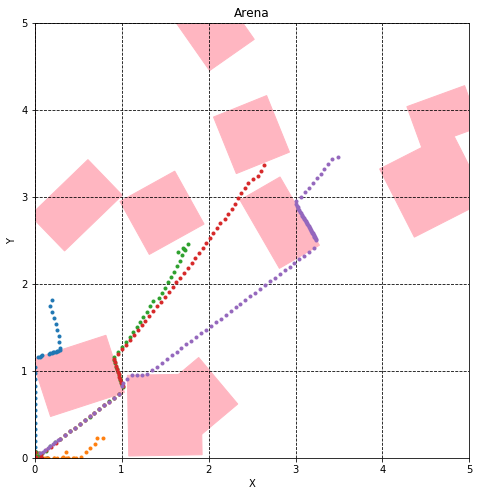

In [24]:
fig,ax=plt.subplots(figsize=(8, 8))
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim((0,l))
ax.set_ylim((0,b))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')

for q in rectangle:
    patch=plt.Rectangle((q[0],q[1]),q[2],q[3],q[4],color='lightpink')
    ax.add_patch(patch)

plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(8, 8))
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
for q in rectangle:
    pat=plt.Rectangle((q[0],q[1]),q[2],q[3],q[4],color='lightpink')
    ax.add_patch(pat)    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()